In [57]:
# what to do
#clean
# build a tensorflow model
#train and predicting
#save model and reload

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras  # type: ignore # high level APIs
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore # Augmentation (note: preprocessing, not processing)
from tensorflow.keras.models import Sequential  # type: ignore # linear stack of neural network layers (note: Sequential, not sequential)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # type: ignore # layer CNN (note: Flatten, not Flattern)
from tensorflow.keras.optimizers import Adam  # type: ignore # Optimizer for training (note: optimizers, not optimisers)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # type: ignore # training callbacks

In [59]:
data=pd.read_csv('Churn (2).csv')

In [60]:
data.head(5)

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [61]:
data.shape

(7044, 21)

In [62]:
#check for missing values
data.isnull().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [63]:
#columns
data.columns

Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Senior Citizen,7044.0,0.162124,0.368590,0.00,0.0,0.00,0.00,1.00
tenure,7044.0,32.366695,24.560582,0.00,9.0,29.00,55.00,72.00
Monthly Charges,7044.0,64.756736,30.090786,18.25,35.5,70.35,89.85,118.75


In [65]:
# the relation of missing values of totalcharges to the tenure
data.loc[data['tenure']== 0, ['tenure','Total Charges']]


,tenure,Total Charges
489,0,
754,0,
937,0,
1083,0,
1341,0,
3332,0,
3827,0,
4381,0,
5219,0,
6671,0,


In [66]:
data['Total Charges']=pd.to_numeric(data['Total Charges'],errors='coerce')
data['Total Charges'] = data['Total Charges'].fillna(data['Total Charges'].median())

In [67]:
catergorical_col=['Gender','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Total Charges','Churn']
for col in catergorical_col:
    mode=data[col].mode()[0]
    data[col].fillna(mode,inplace=True)

In [68]:
#check data types
data.dtypes

Customer ID           object
Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object

In [69]:
#drop unnecessary columns
col_catergory=data.drop(columns=['Customer ID'],inplace=True)
data.shape

(7044, 20)

In [70]:
data['Senior Citizen']=pd.to_numeric(data['Senior Citizen'],errors='coerce')
data['Senior Citizen'] = data['Senior Citizen']. fillna(data['Senior Citizen'].median())

In [71]:
data.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [72]:
data=data.drop_duplicates()


In [73]:
#check for duplicates
print(data.duplicated().sum())

0


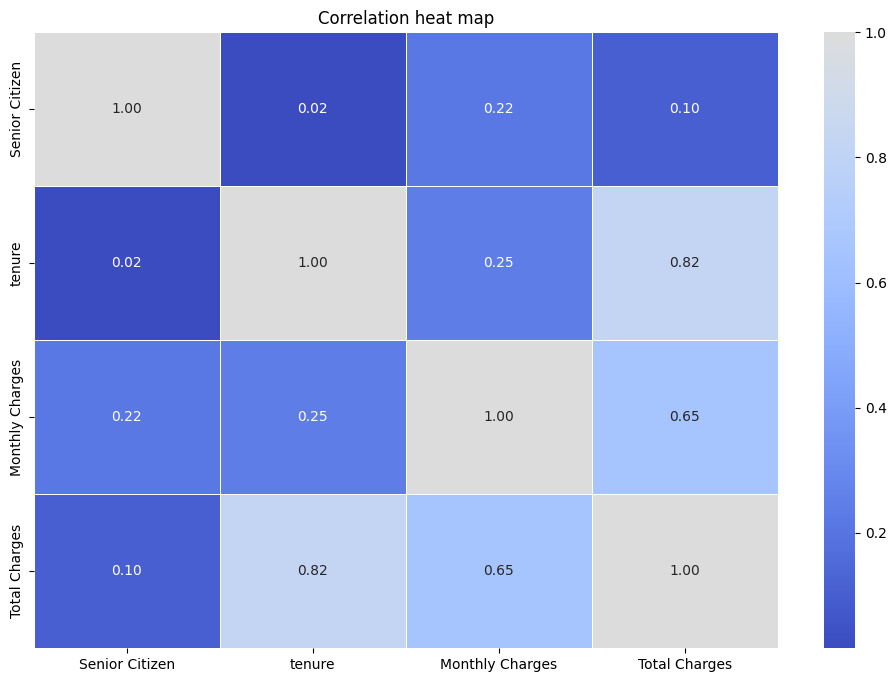

In [74]:
train=data.corr(numeric_only=True)
plt.figure(figsize=(12,8))
plt.title('Correlation heat map')
sns.heatmap(train,annot=True, cmap='coolwarm',fmt='.2f',linewidths=0.5, center=True)
plt.show()

In [75]:
data.corr(numeric_only=True)

,Senior Citizen,tenure,Monthly Charges,Total Charges
Senior Citizen,1.000000,0.015349,0.219434,0.101886
tenure,0.015349,1.000000,0.245251,0.824875
Monthly Charges,0.219434,0.245251,1.000000,0.650341
Total Charges,0.101886,0.824875,0.650341,1.000000


In [76]:
#check the value of the target variable
data['Churn'].value_counts()*100/len(data['Churn'])

Churn
No     73.550776
Yes    26.449224
Name: count, dtype: float64

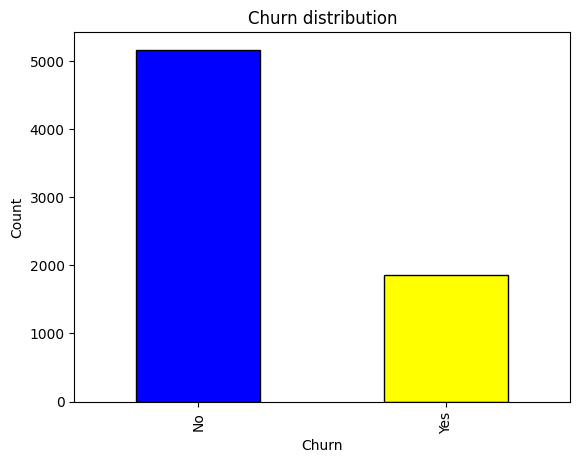

In [77]:
#plot Churn
churn=data['Churn'].value_counts()
churn.plot(kind='bar',color=['blue','yellow'],edgecolor='black')
plt.title("Churn distribution")
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [78]:
#unique values
for i in data.columns:
    print(f'Unique:{data[i].nunique()}')

Unique:2
Unique:2
Unique:2
Unique:2
Unique:73
Unique:2
Unique:3
Unique:3
Unique:3
Unique:3
Unique:3
Unique:3
Unique:3
Unique:3
Unique:3
Unique:2
Unique:4
Unique:1585
Unique:6530
Unique:2


In [79]:
for i in catergorical_col:
    print("\n")
    print(data[i].value_counts())



Gender
Male      3541
Female    3480
Name: count, dtype: int64


Partner
No     3619
Yes    3402
Name: count, dtype: int64


Dependents
No     4911
Yes    2110
Name: count, dtype: int64


Phone Service
Yes    6339
No      682
Name: count, dtype: int64


Multiple Lines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64


Internet Service
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64


Online Security
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64


Online Backup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64


Device Protection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64


Tech Support
No                     3465
Yes                    2044
No internet service    1512
Name: count, dtype: int64


Streaming TV

In [80]:
data.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [81]:
num_cols=['tenure','Monthly Charges','Total Charges']
catergorical_col=['Gender','Partner','Dependents','Phone Service','Multiple Lines','Internet Service','Online Backup','Device Protection','Tech Support','Straming TV','Streaming Movies','Contract','Paperless Billing','Payment Method']

In [82]:
#Visualise the distribution of numerical features
plt.figure(figsize=(12,10))
for i, col in enumerating(num_cols, 1):
    plt.subplot(3,2,i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
plt.tight_layout()
plt.show()   

NameError: name 'enumerating' is not defined

<Figure size 1200x1000 with 0 Axes>

In [ ]:
label='Churn'
plt.figure(figsize = (12,24))
for i, col in enumerate(catergorical_col, 1):
    plt.subplot(6, 3, 1)
    ax = sns.countplot(data, x = col, hue = label)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.xticks(rotation = 15)
plt.tight_layout()
plt.show()   

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[num_cols]=scaler.fit_transform(data[num_cols])


In [ ]:
data[num_cols].mean()

In [ ]:
#split the data
y = data['Churn']
x = data.drop('Churn', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split #type : ignore
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


In [ ]:
from sklearn.preprocessing import OneHotEncoder
combined=pd.concat([x_train,x_test],axis=0)

#initialise the onehotencoder
encoder=OneHotEncoder(Sparse_output=False,handle_unknown='ignore')
encoded_catergories=encoder.fit_transform(combined[catergorical_col])

In [ ]:
#we use to get feature names out to get column names for the encoded data
encoded_columns=encoder.get_feature_names_out(catergorical_col)


In [ ]:
#convert into a dataframe
df=pd.DataFrame(encoded_catergories,columns=encoded_columns,index=combined.index)


In [ ]:
#drop original categorical columns and join encoded ones
combined.drop(columns=catergorical_col,inplace=True)
combined=pd.concat([combined,df],axis=1)

In [ ]:
#resplit
x_train = combined.loc[x_train.index]
x_test = combined.loc[x_test.index]


In [ ]:
encoder.categories_

In [ ]:
df.head()

In [ ]:
y_train = y_train.map({'No':0,'Yes':1})
y_test = y_test.map({'No':0, 'Yes': 1})

In [ ]:
model = Sequential()
model.add(dense(64, input_shape=(x_train.shape[1],),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001)
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=6, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop, checkpoint],
                    verbose=1)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

In [ ]:
predictions = (model.predict(x_test > 0.5).astype("int32"))

In [ ]:
#save
model.save("churn_model_tf.keras")